In [39]:
import h5py
from scipy import ndimage
import matplotlib.pylab as plt
import numpy as np
import sys
%matplotlib inline

# Calculate the connected components
def connectedcomponents( im ):
    im = im.value < 128
    return ndimage.label(im > 0.5)

# Threshold connected components based on number of pixels
def thresholdcc( ccis, minthresh=500 ):
    ccs = []
    for i in xrange(1,ccis[1]):
        if np.array(ccis[0]==i).sum() > minthresh:
            ccs+=[i]
    return ccs
            
# Run through an example
hdf5file='/fileserver/nmec-handwriting/flat_nmec_cropped_bin_uint8.hdf5'
flatnmec=h5py.File(hdf5file,'r')

# 14 doesn't work.
# 12,13,19 has 7.5k+ connected components to threshold
# imname = 'FR-016-007.bin.crop.png.cropcrop.png'
# Between 16-006 and 16-007, he has two completely different scales
flk = flatnmec.keys()
imname = flk[6] # 'FR-016-006.bin.crop.png.cropcrop.png'

print "Calculating connected components"
ccis = connectedcomponents(flatnmec[imname])
print "Thresholding "+str(ccis[1])+" connected components"
ccs = thresholdcc( ccis, minthresh=500 )
print "Finished processing on image "+str(imname)+" and found "+str(len(ccs))+" components"

Calculating connected components
Thresholding 4621 connected components
Finished processing on image FR-003-007.bin.crop.png.cropcrop.png and found 79 components


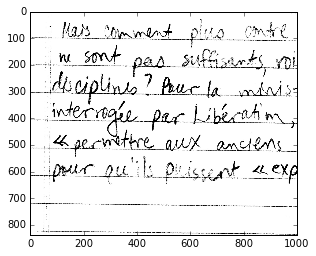

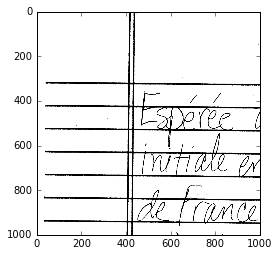

In [42]:
# window = ccis[0]
# a = np.where( window == 11 )
imname = 'FR-016-006.bin.crop.png.cropcrop.png'
plt.imshow( flatnmec[imname][()][0:1000,0:1000], cmap='gray' )
imname = 'FR-016-007.bin.crop.png.cropcrop.png'
plt.figure()
plt.imshow( flatnmec[imname][()][0:1000,0:1000], cmap='gray' )


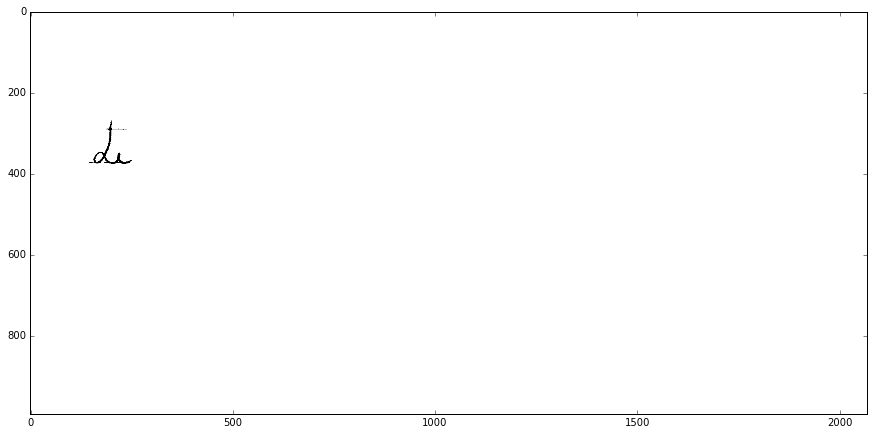

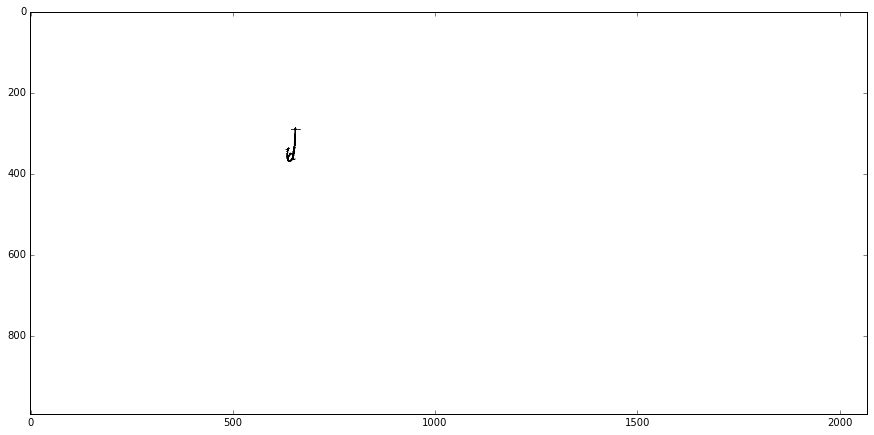

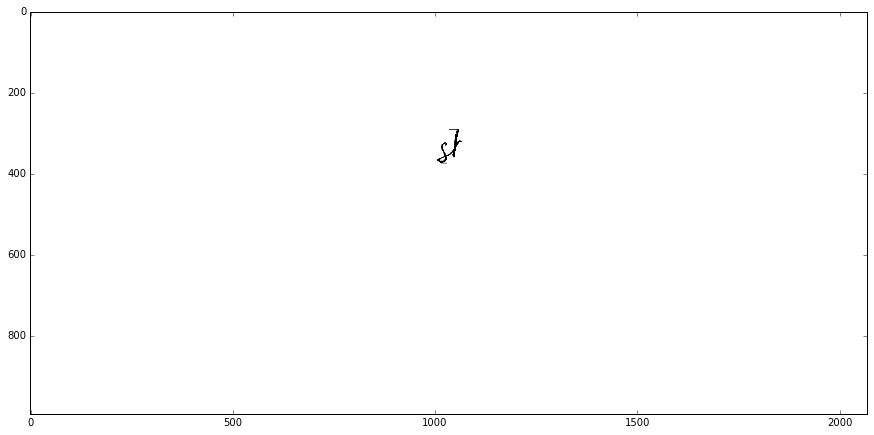

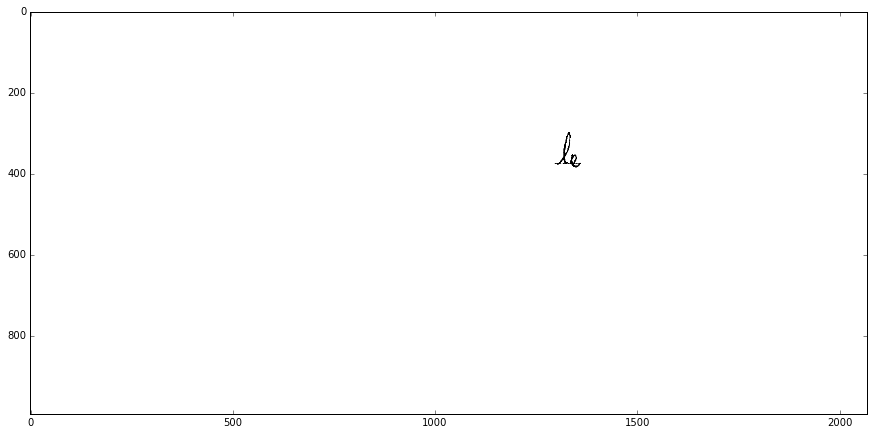

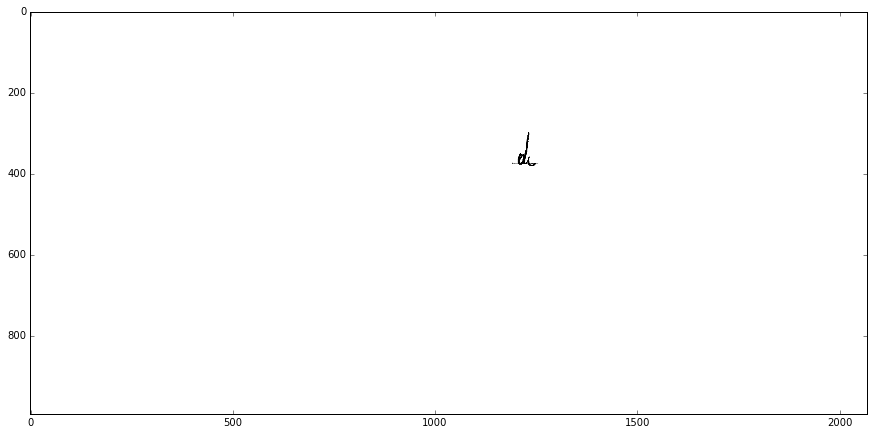

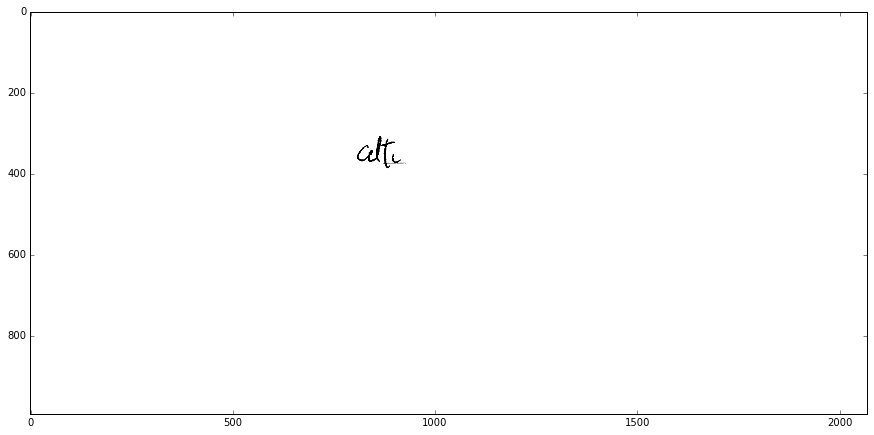

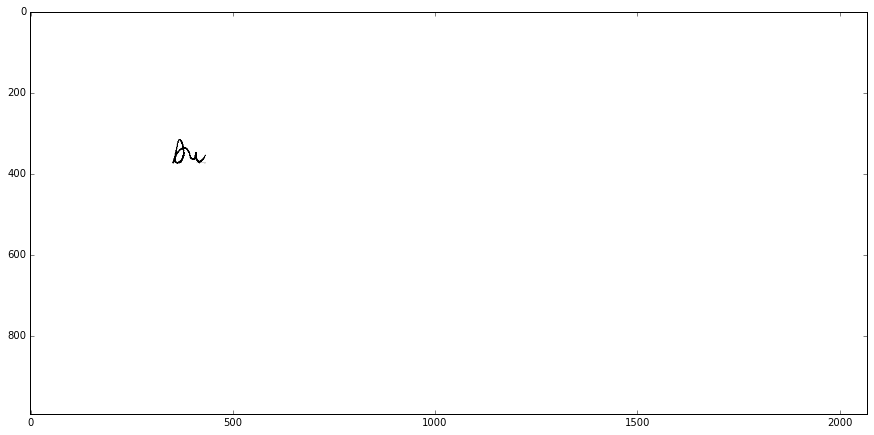

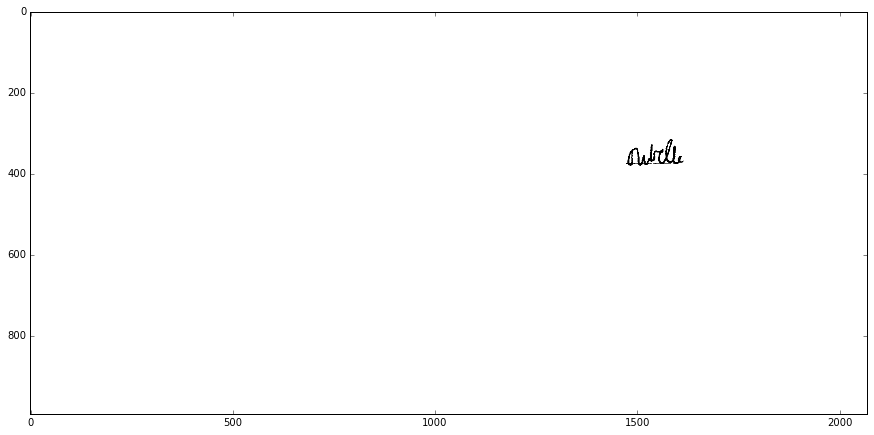

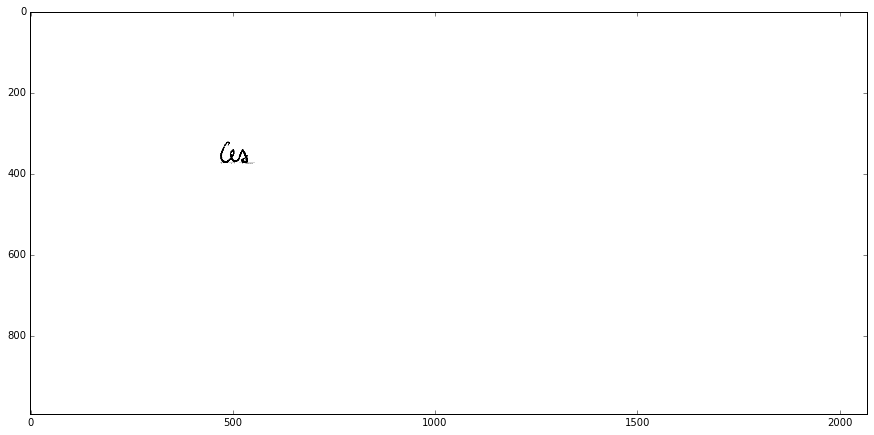

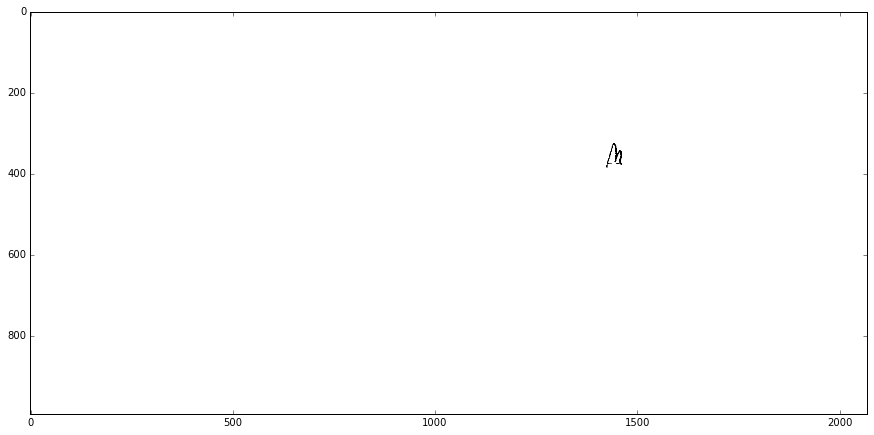

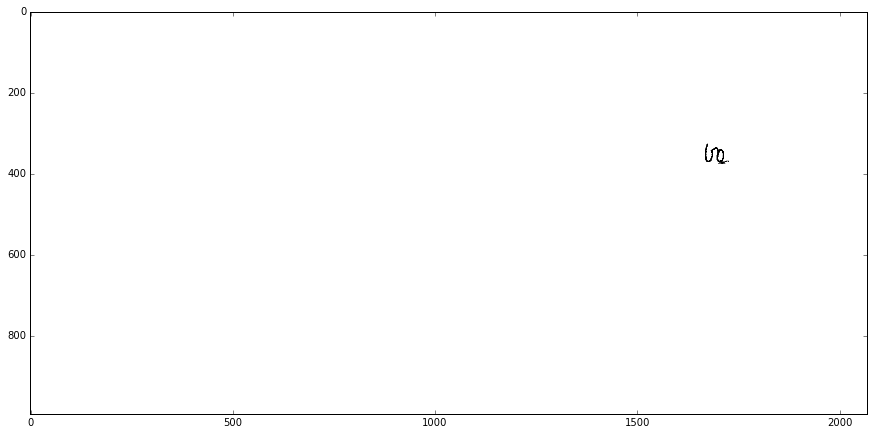

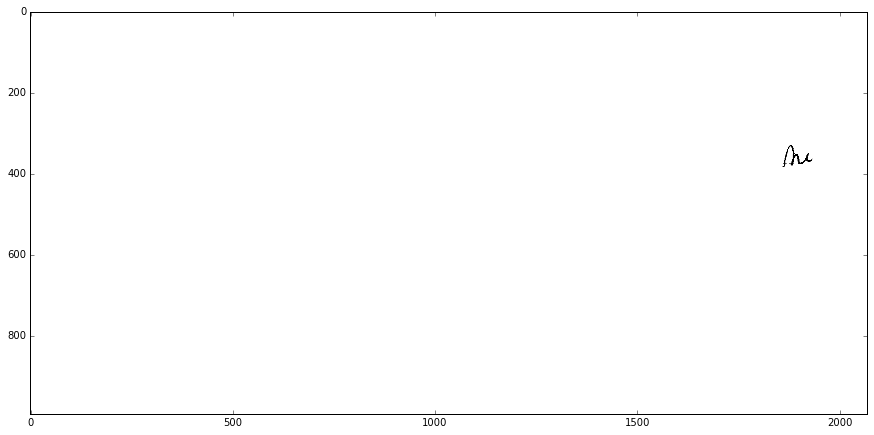

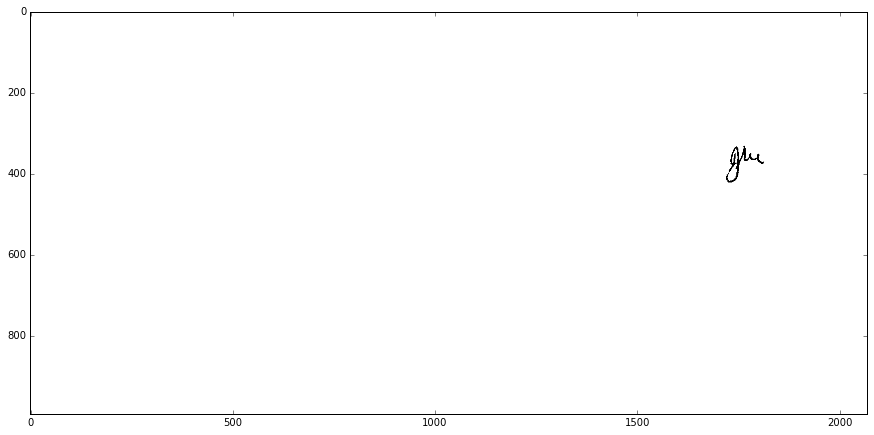

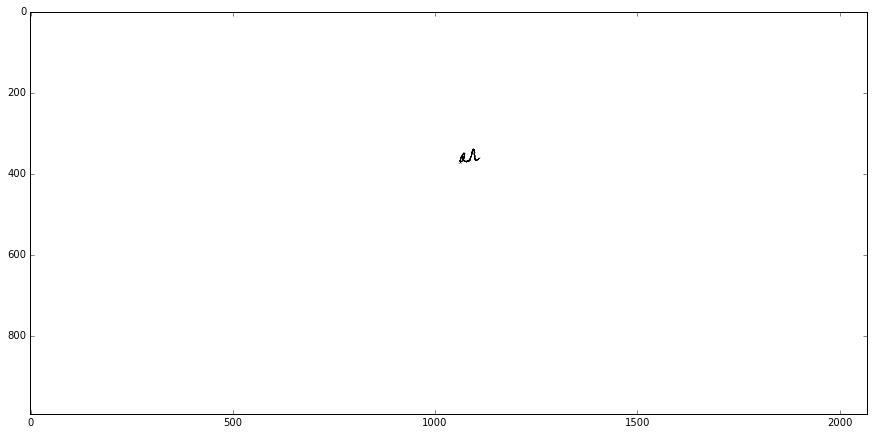

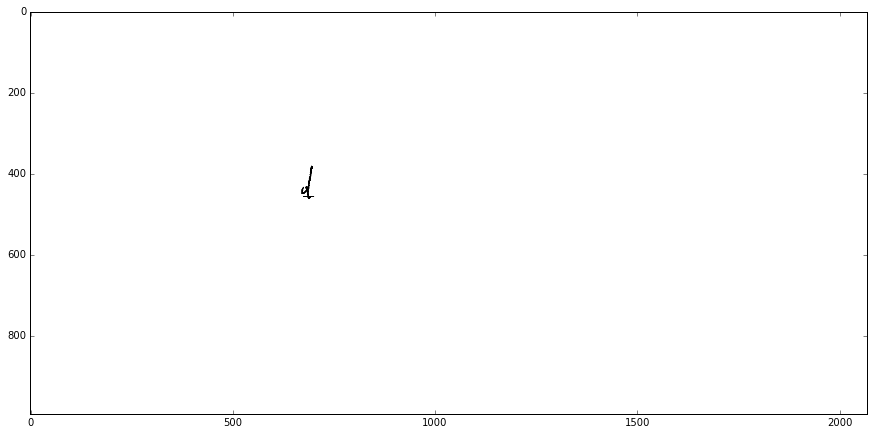

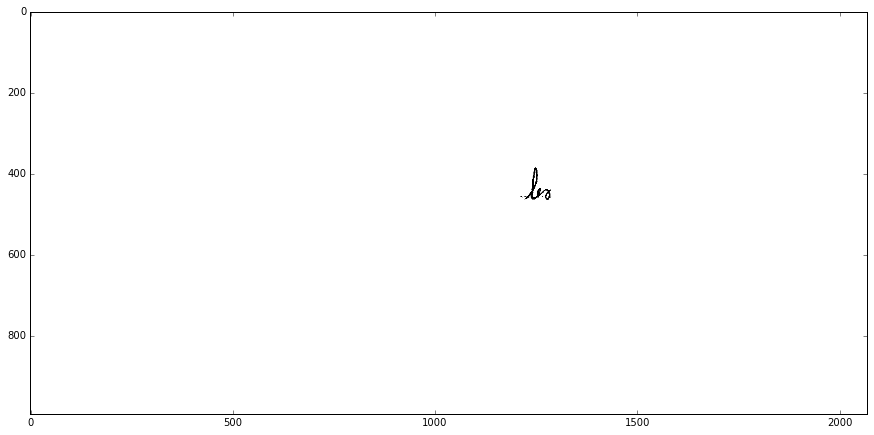

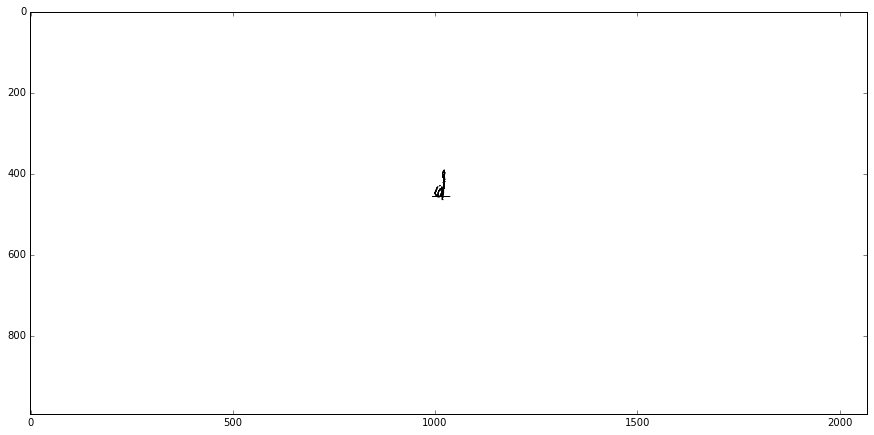

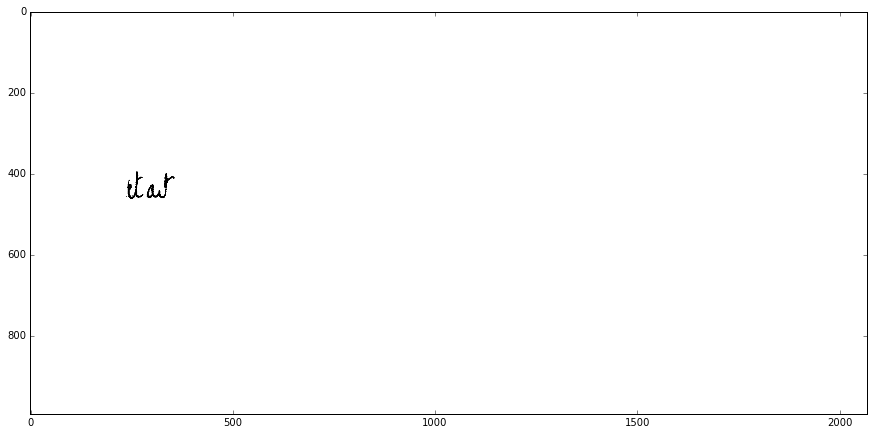

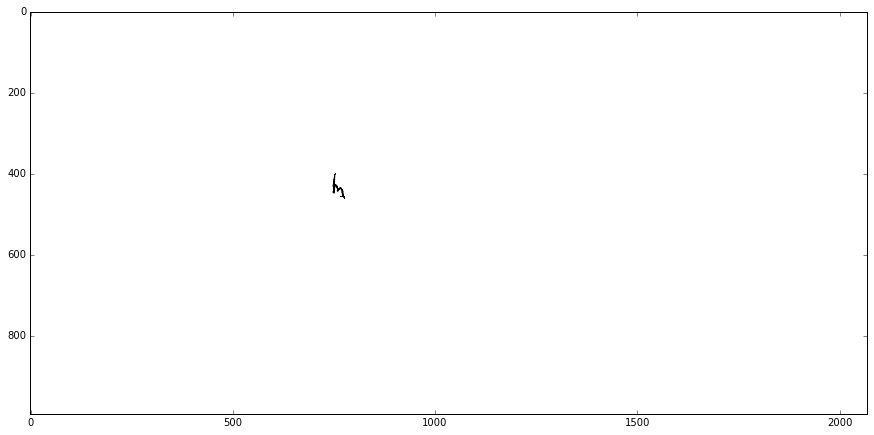

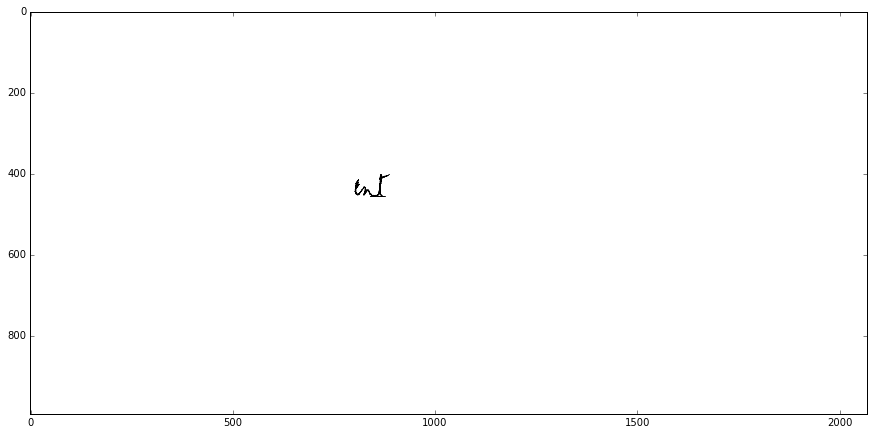

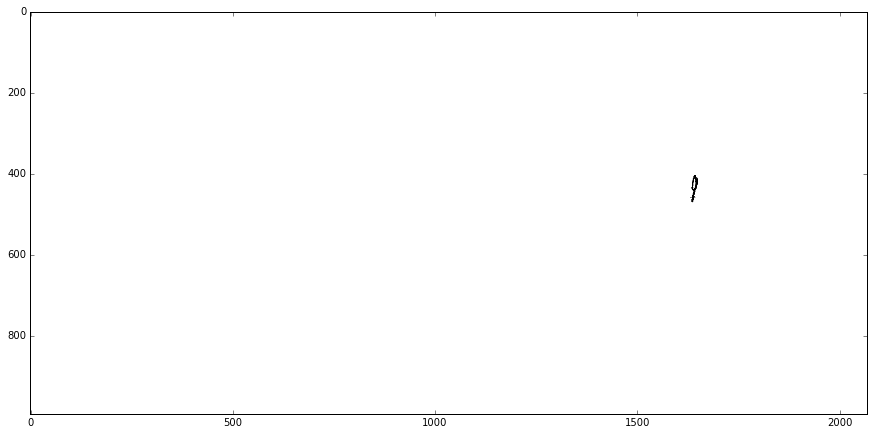

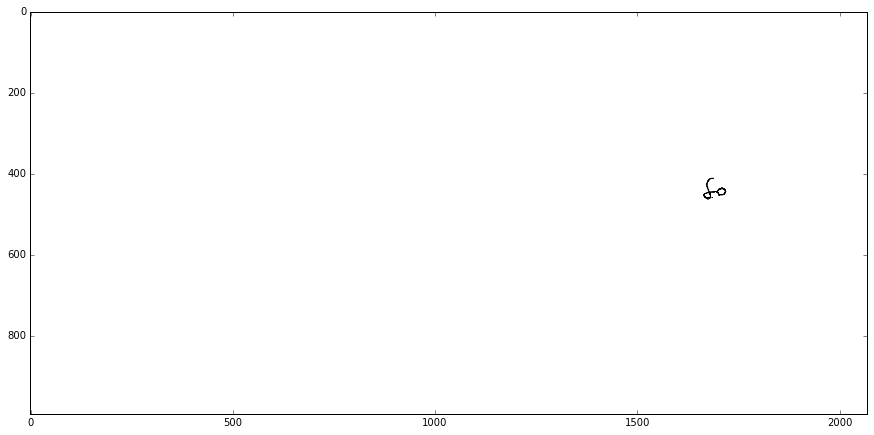

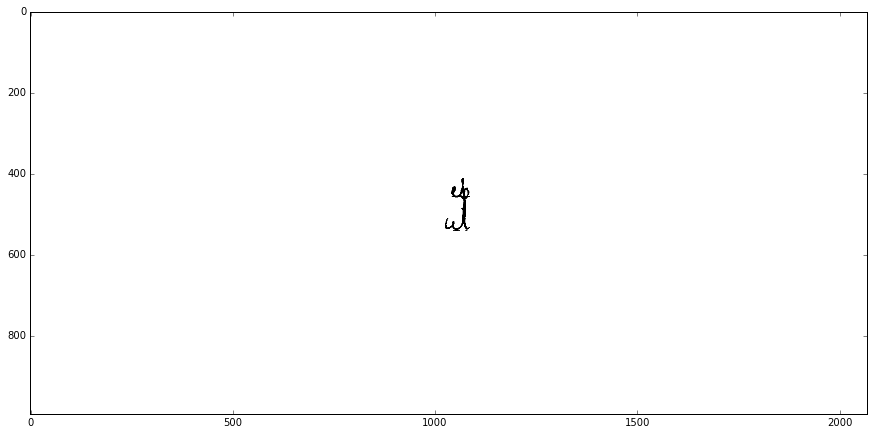

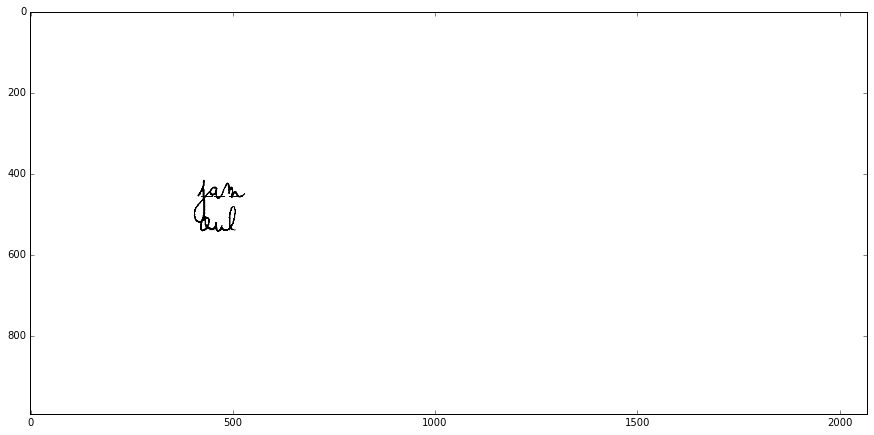

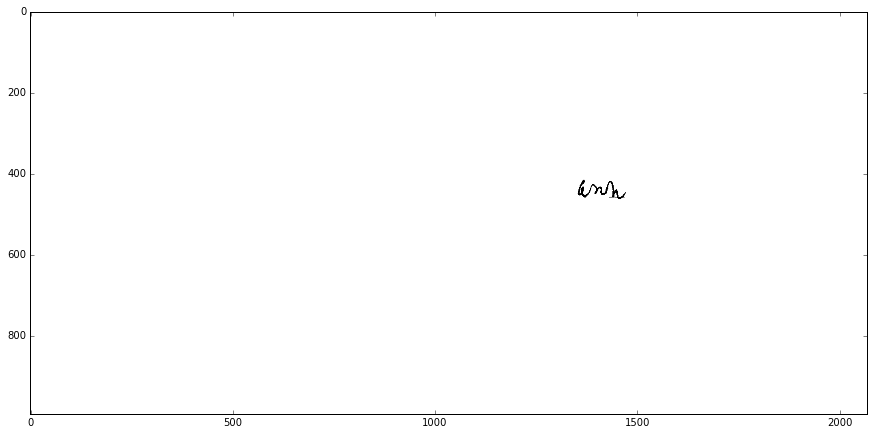

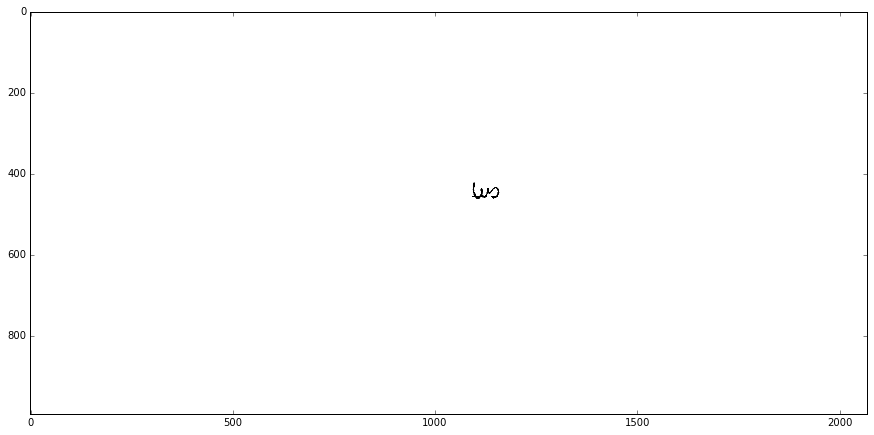

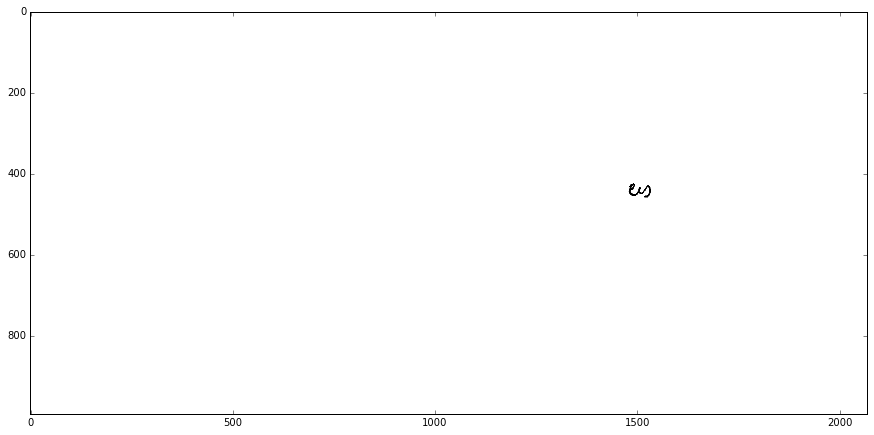

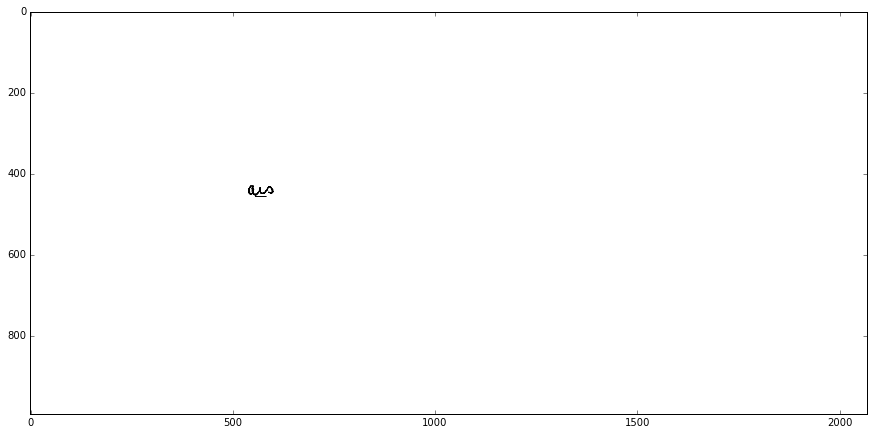

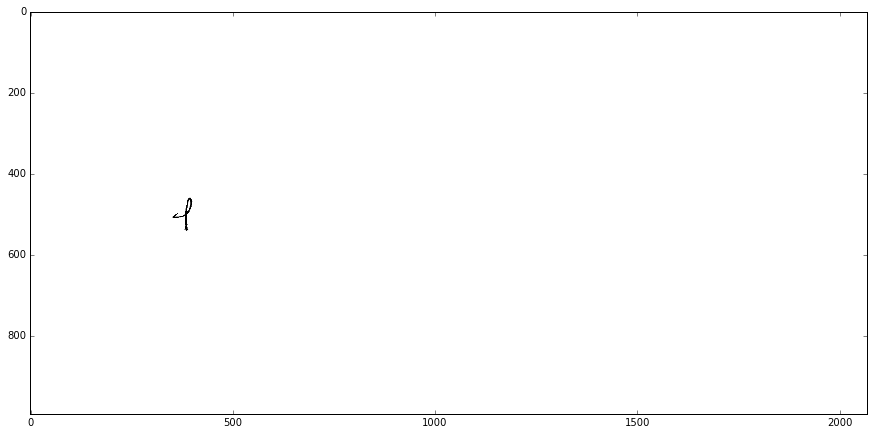

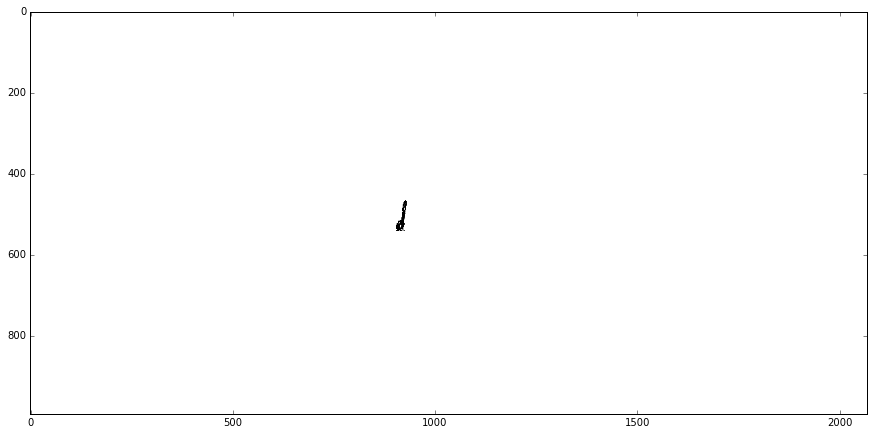

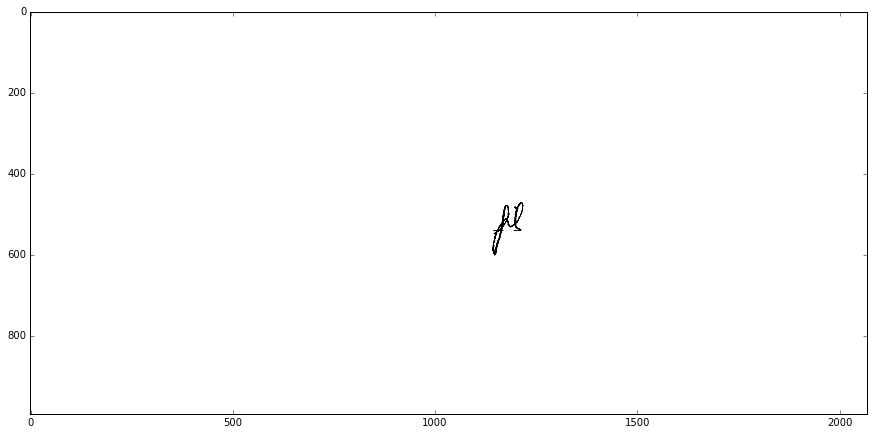

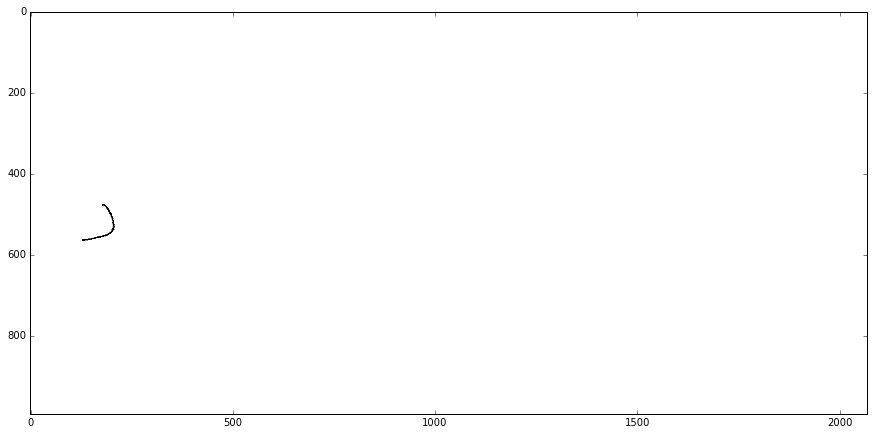

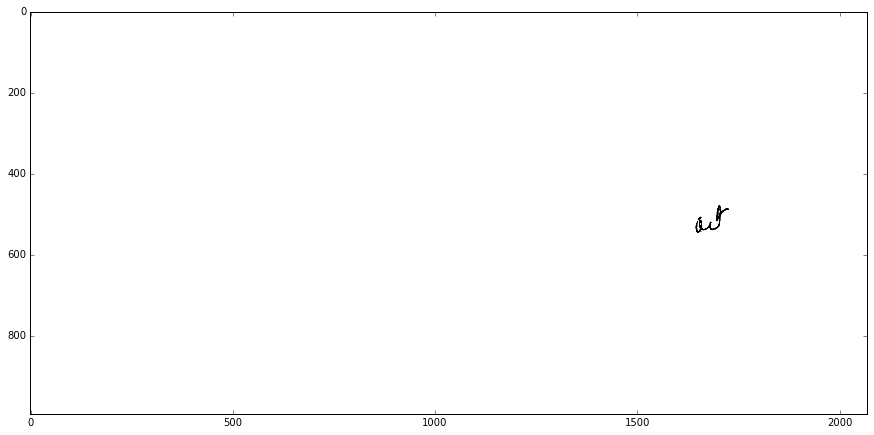

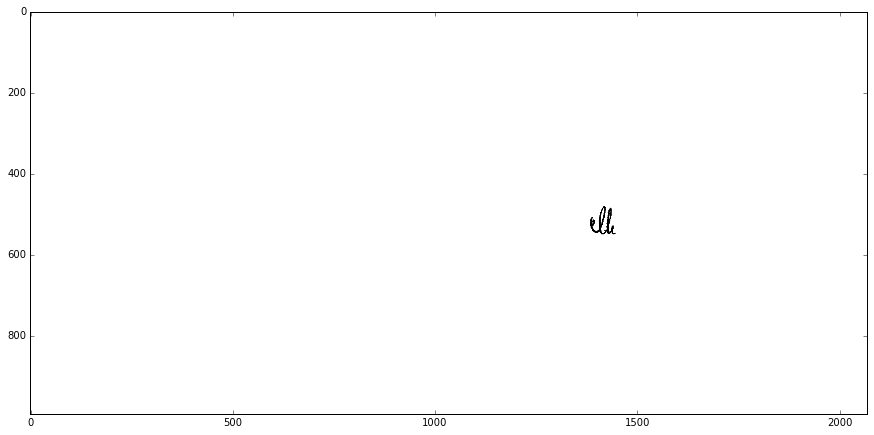

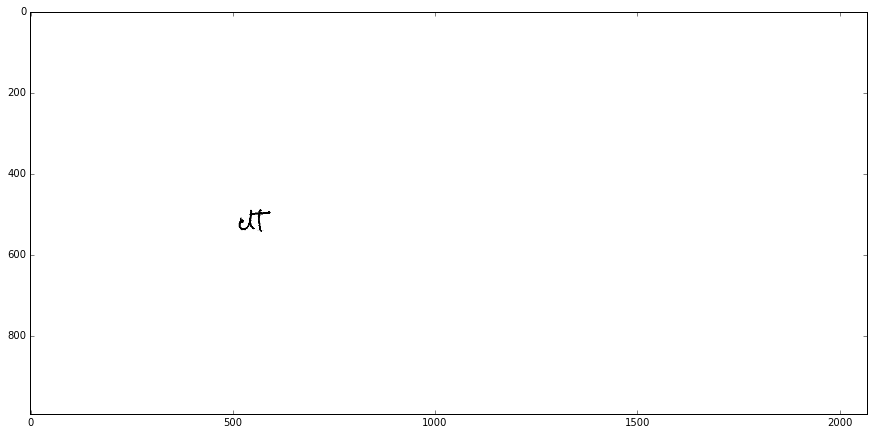

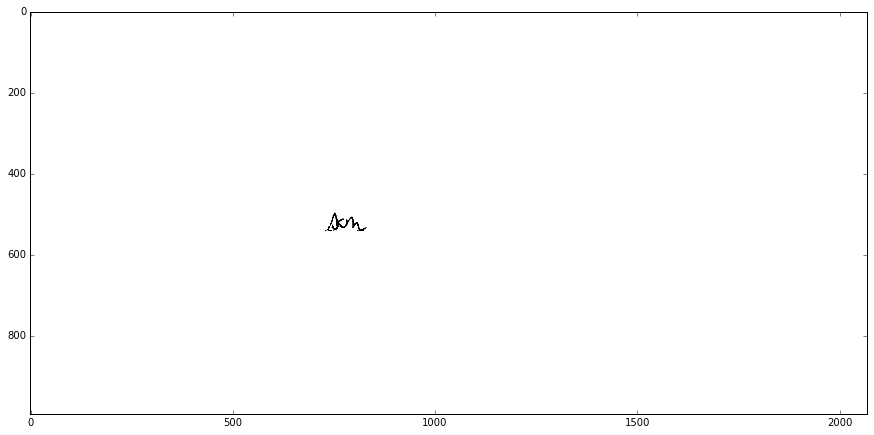

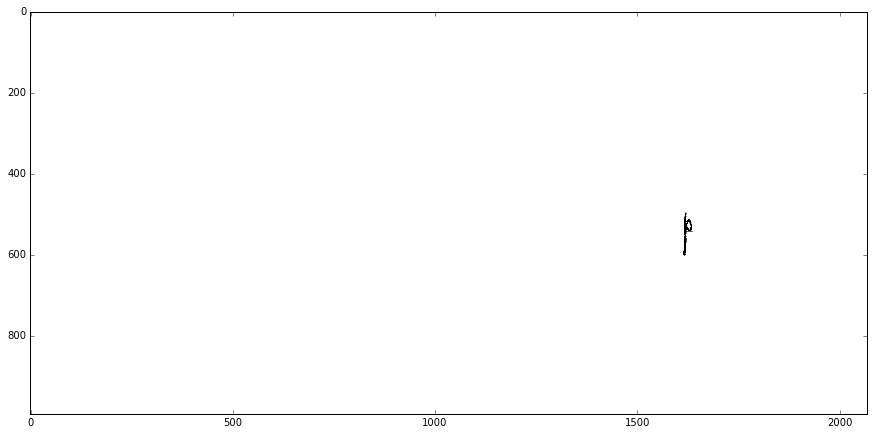

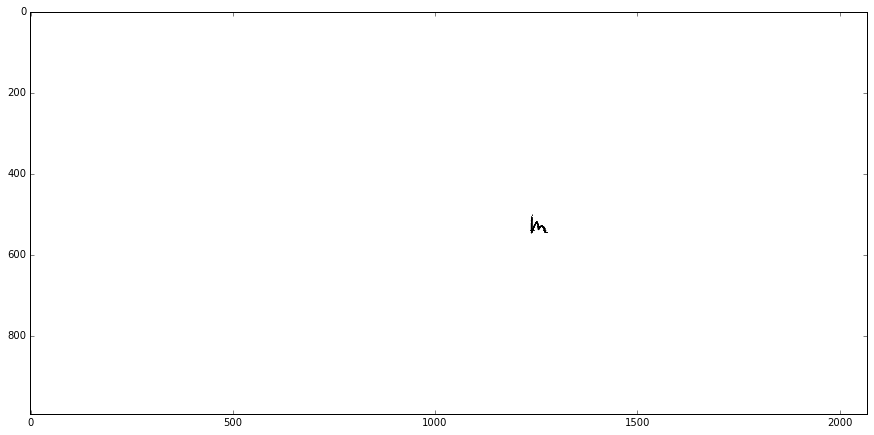

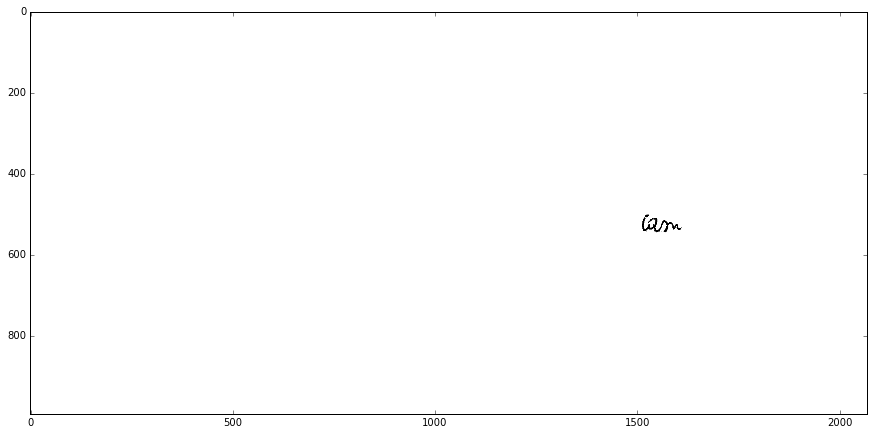

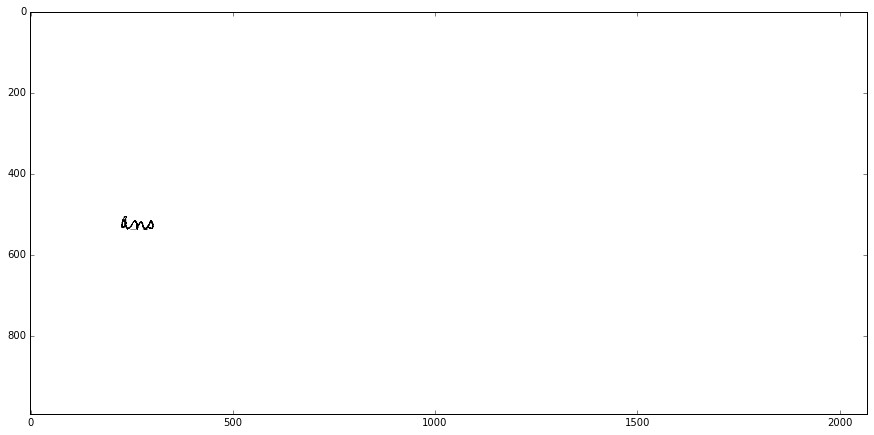

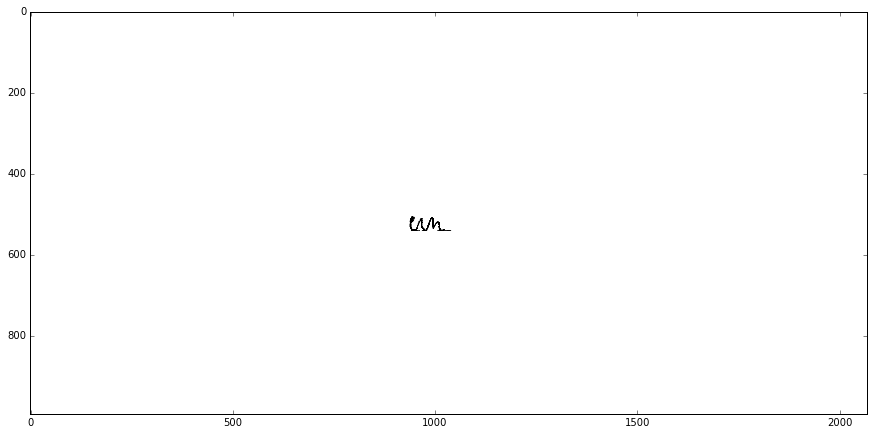

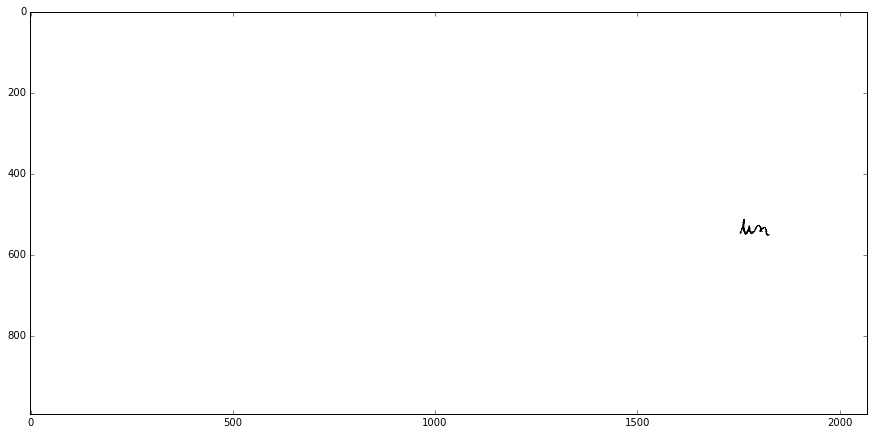

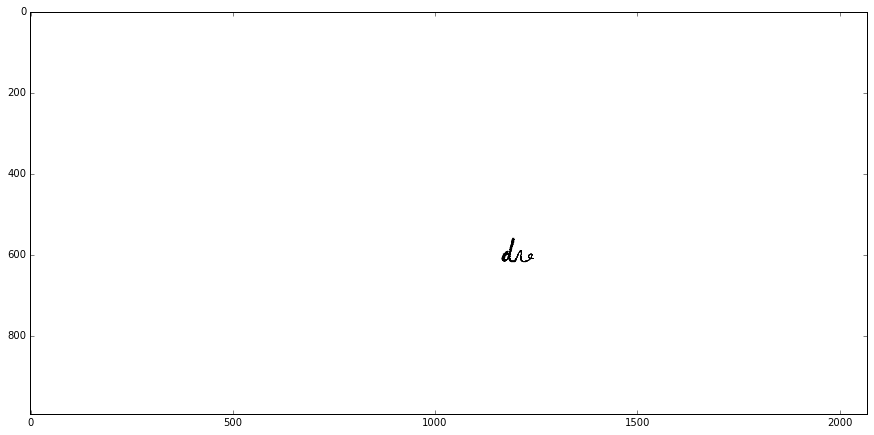

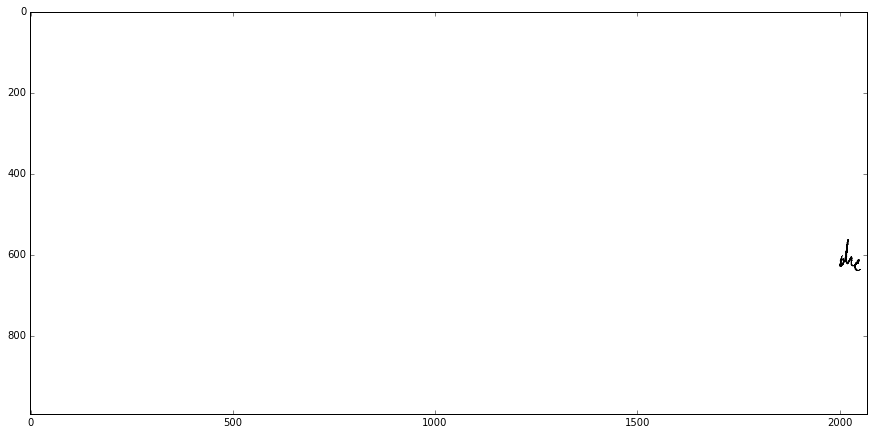

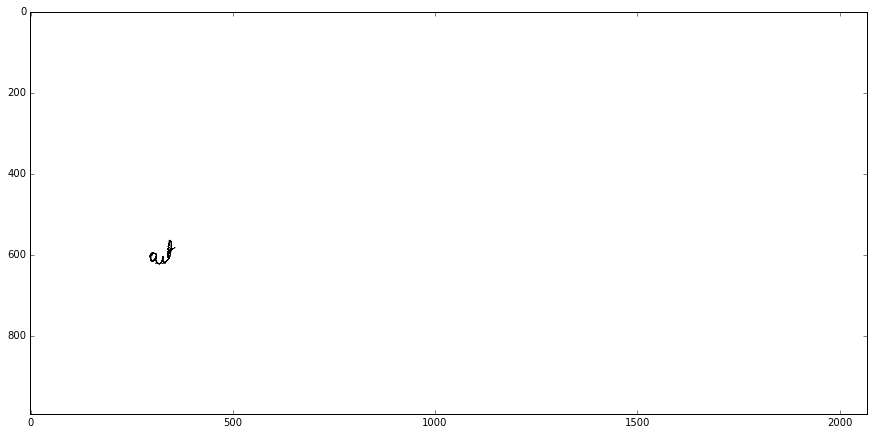

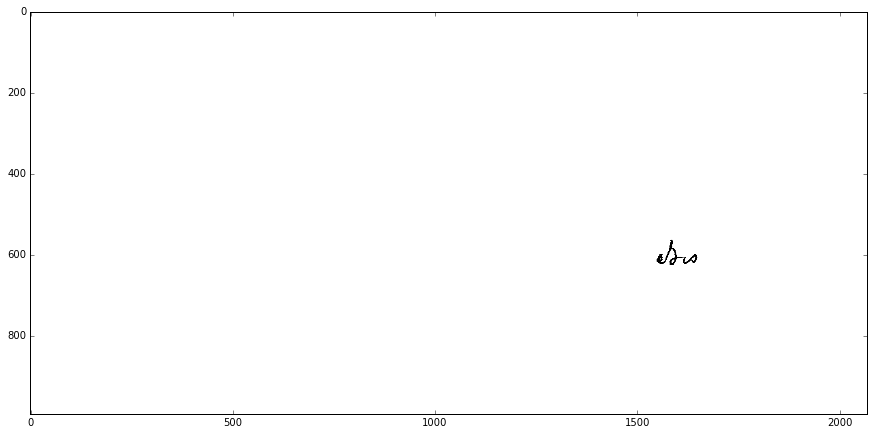

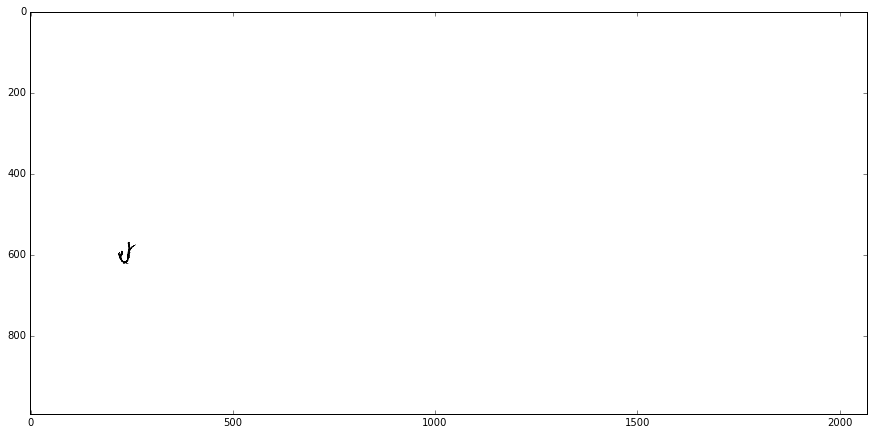

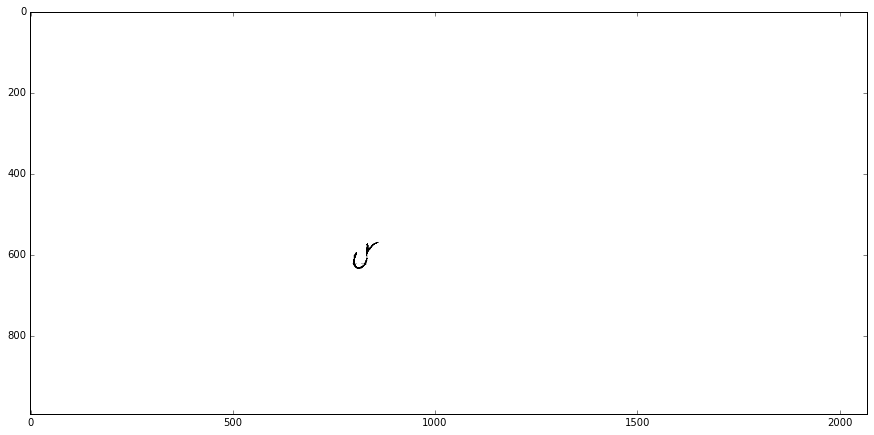

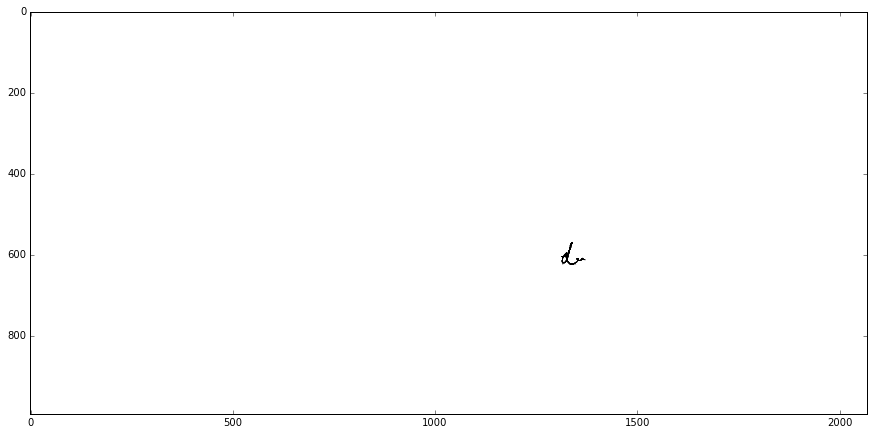

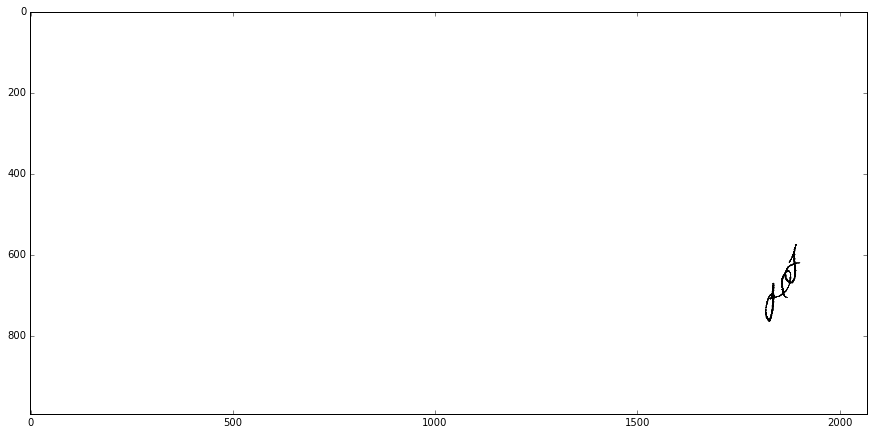

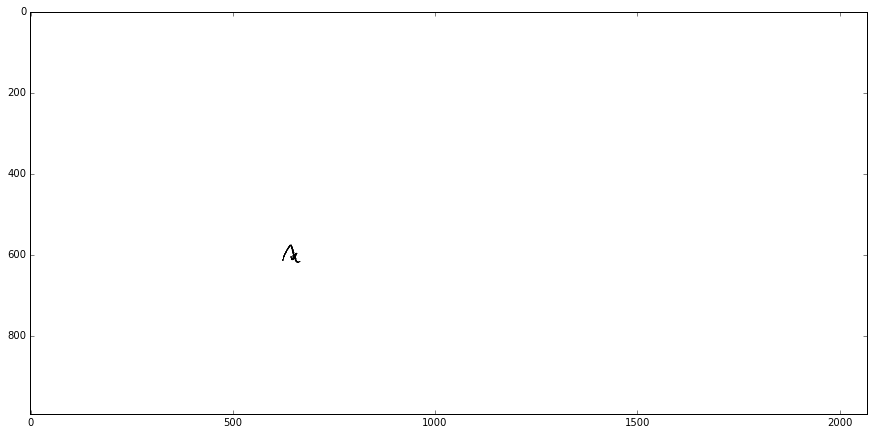

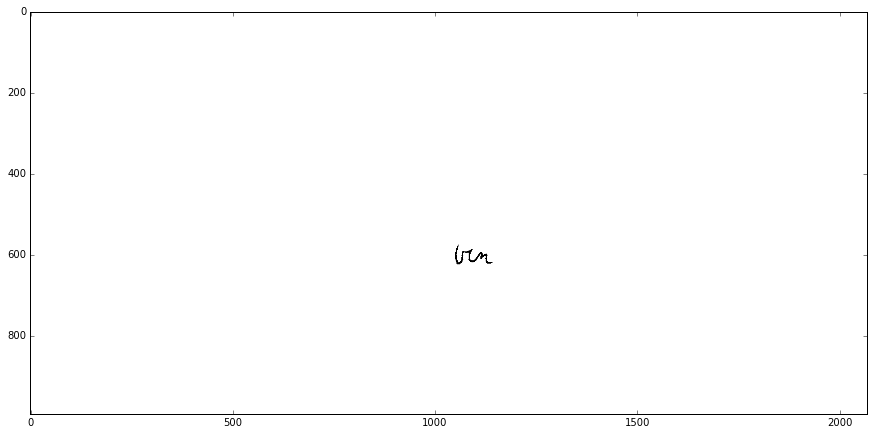

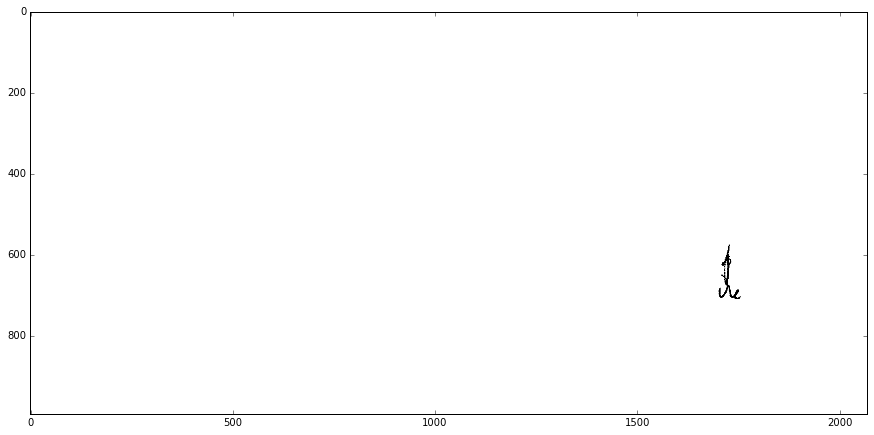

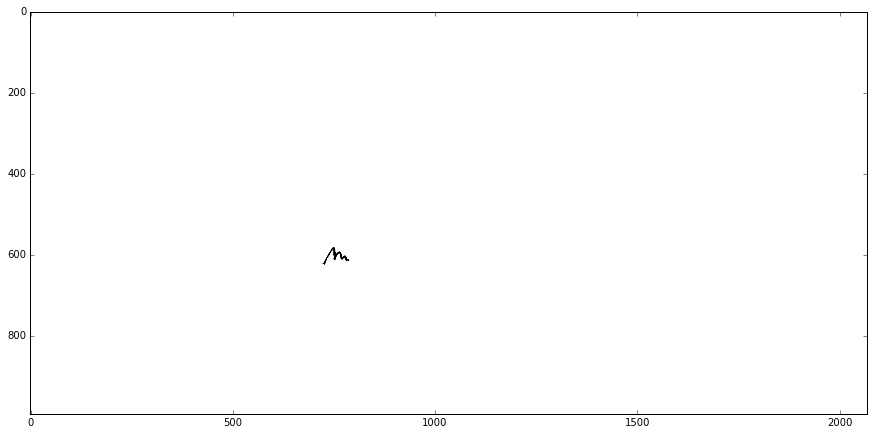

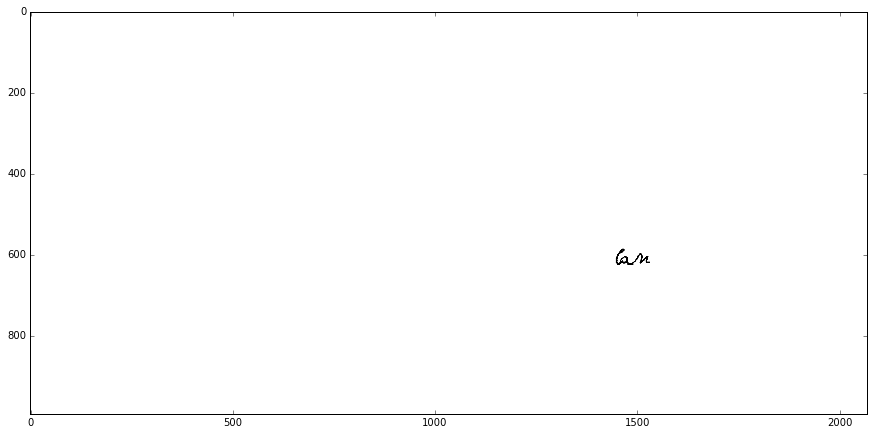

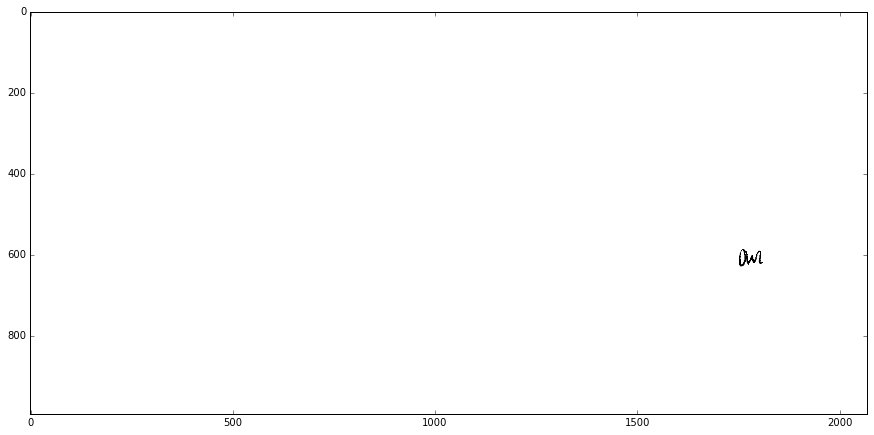

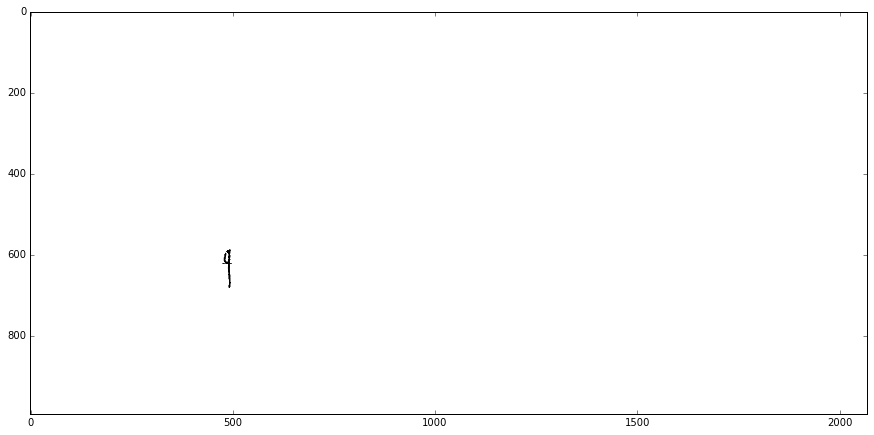

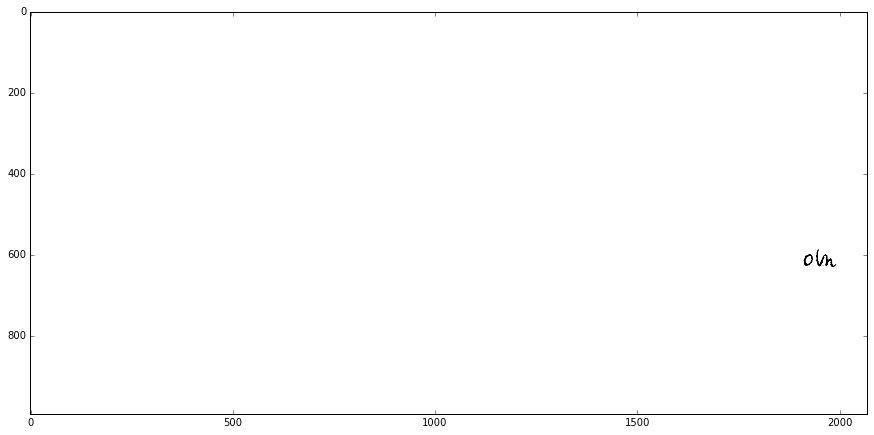

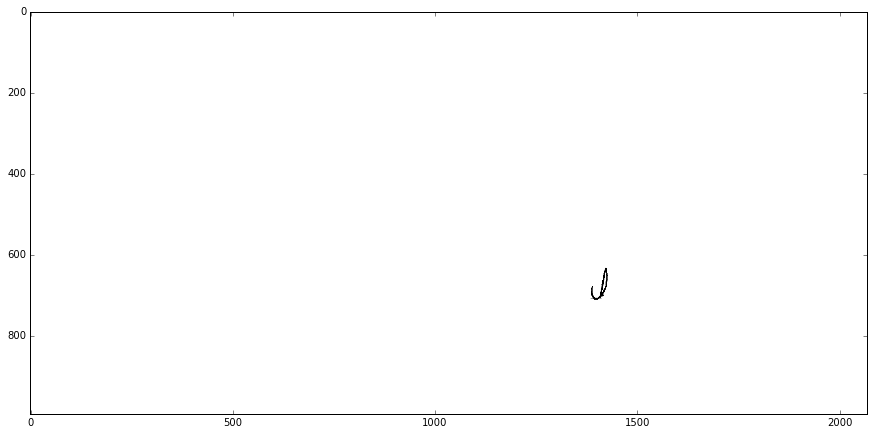

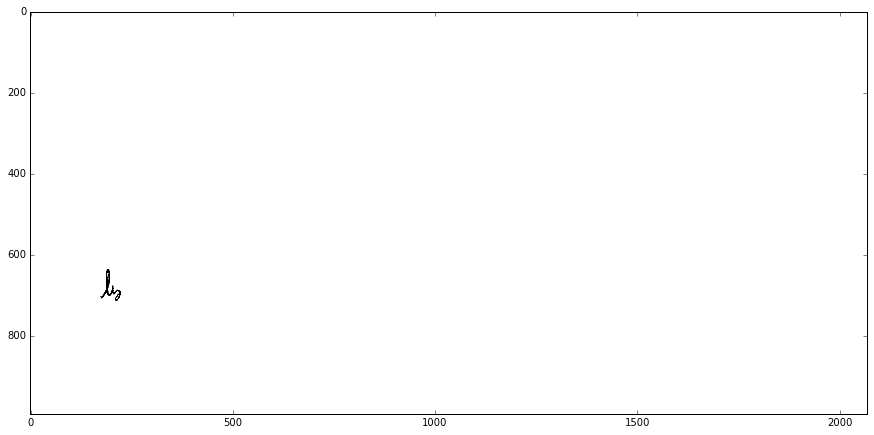

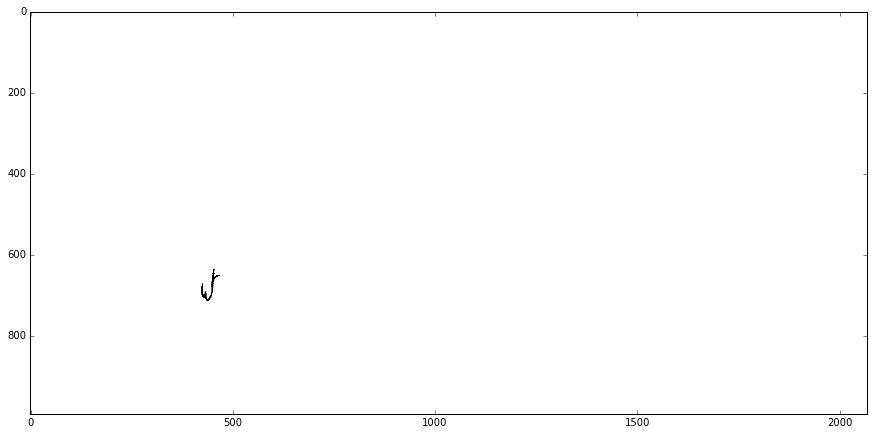

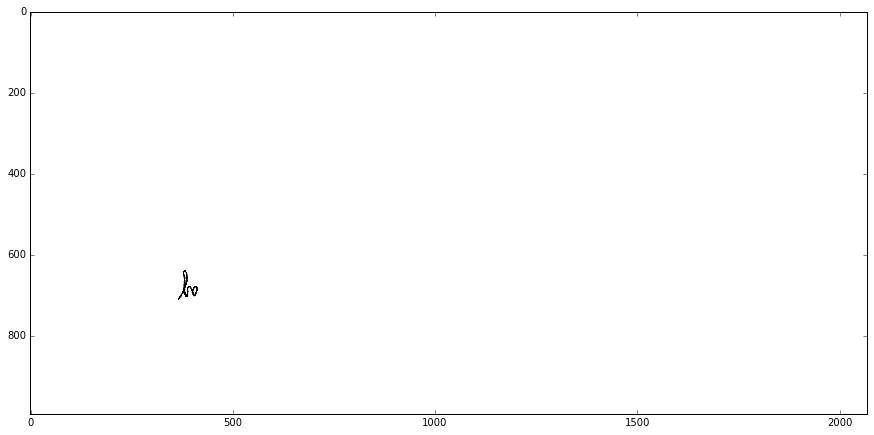

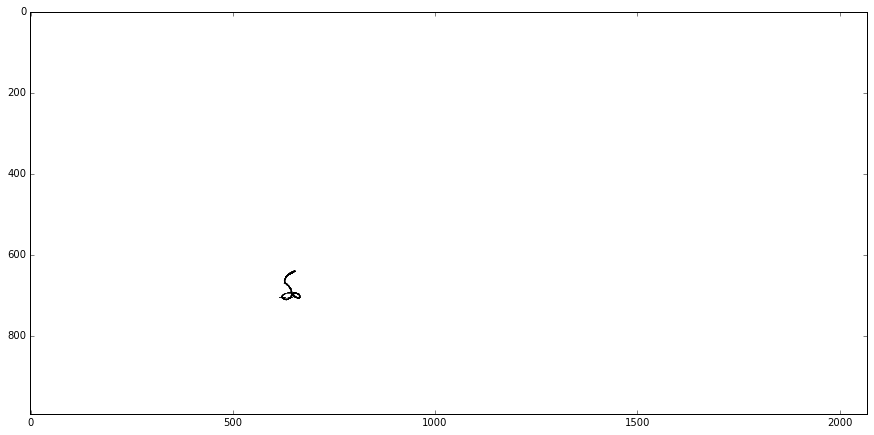

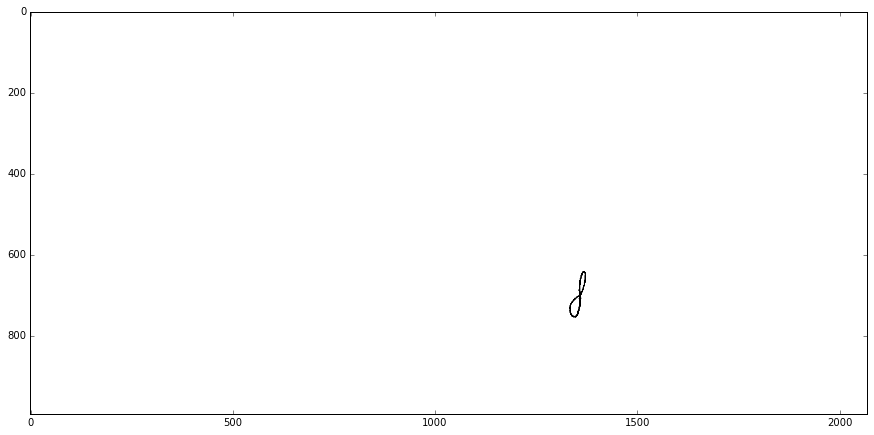

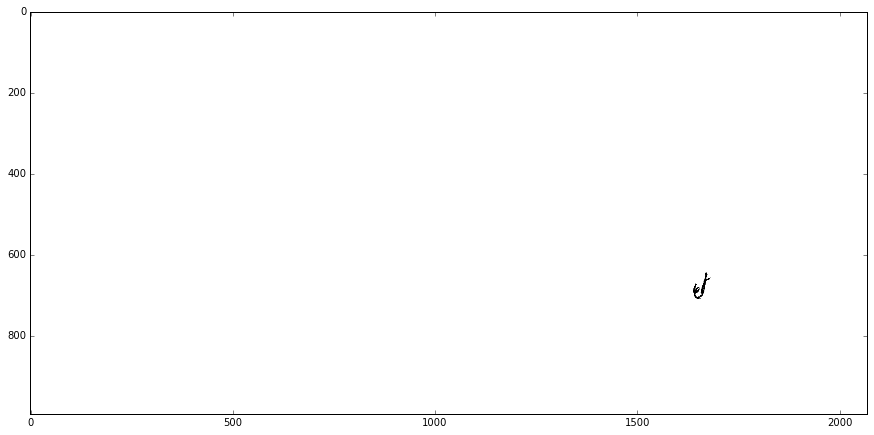

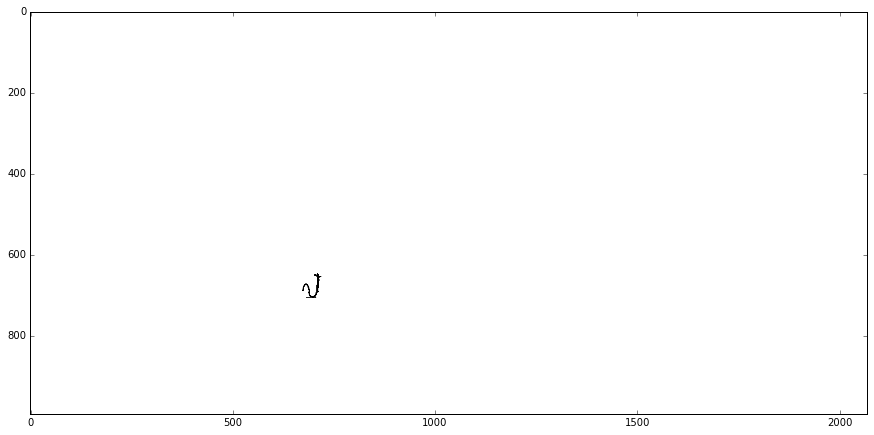

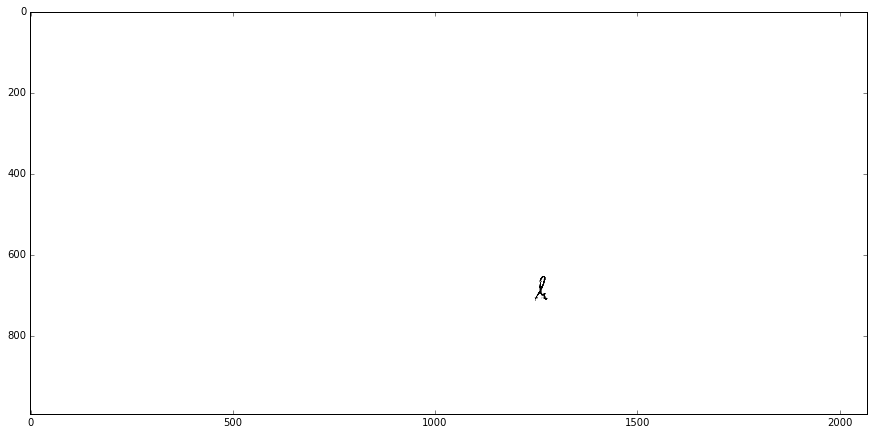

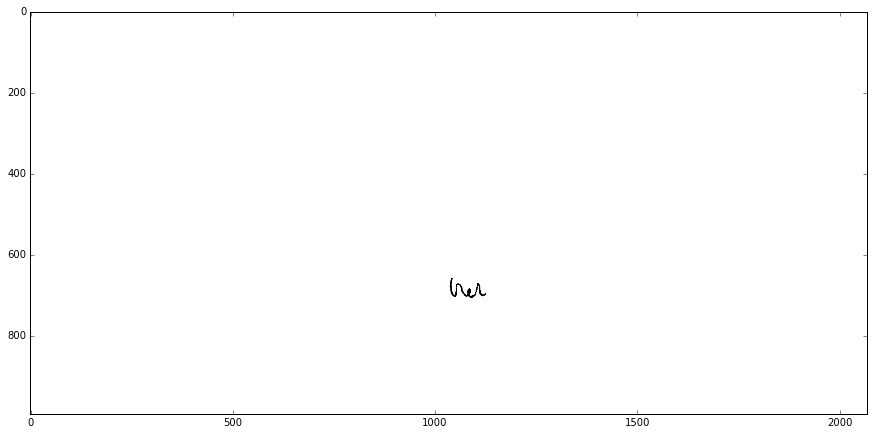

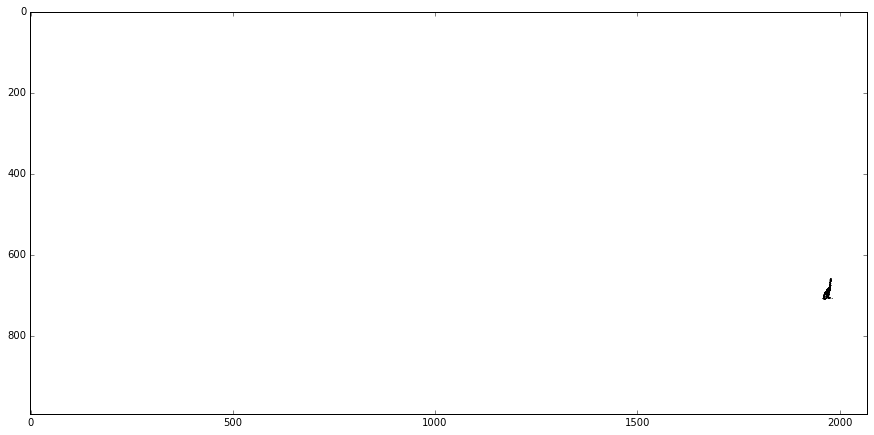

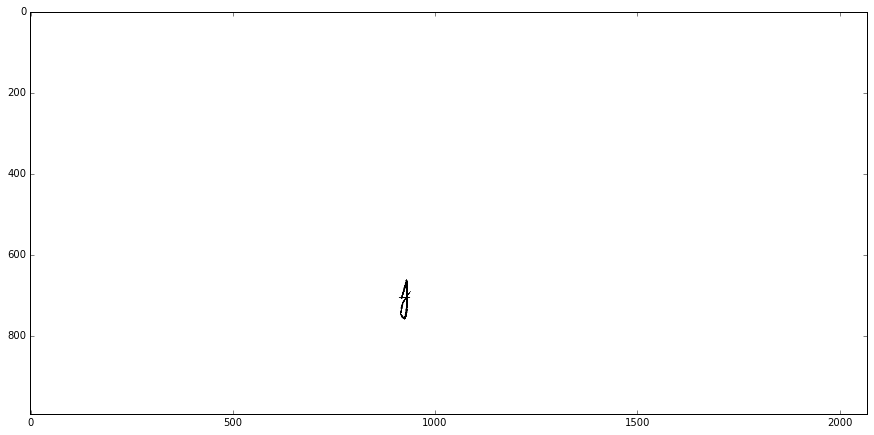

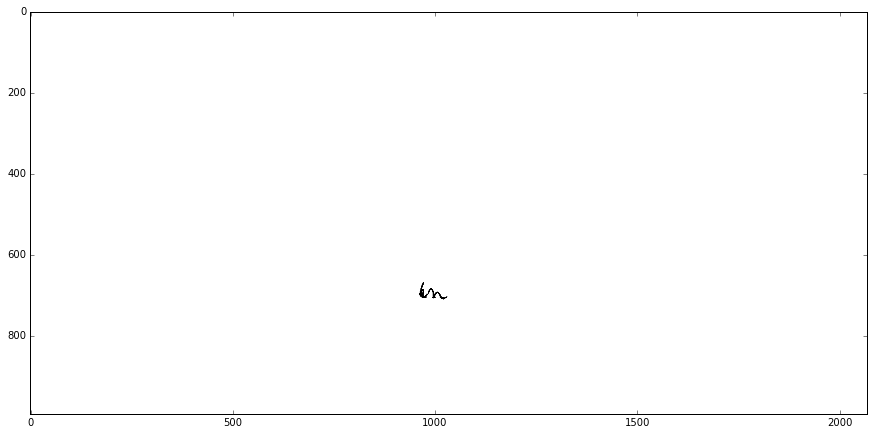

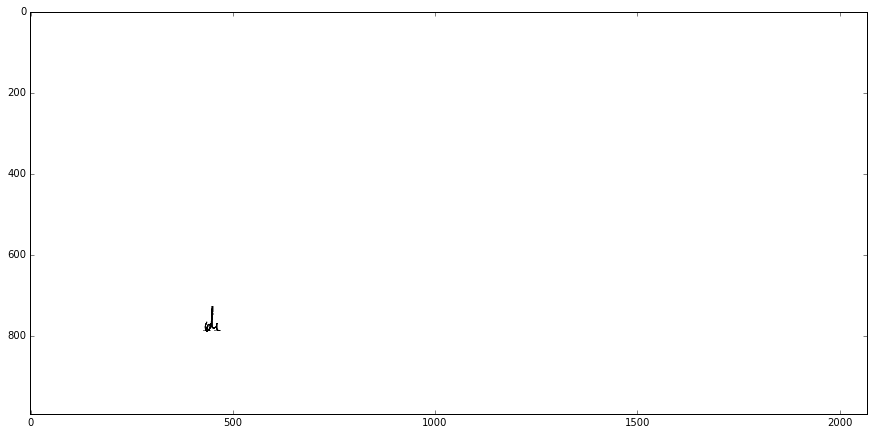

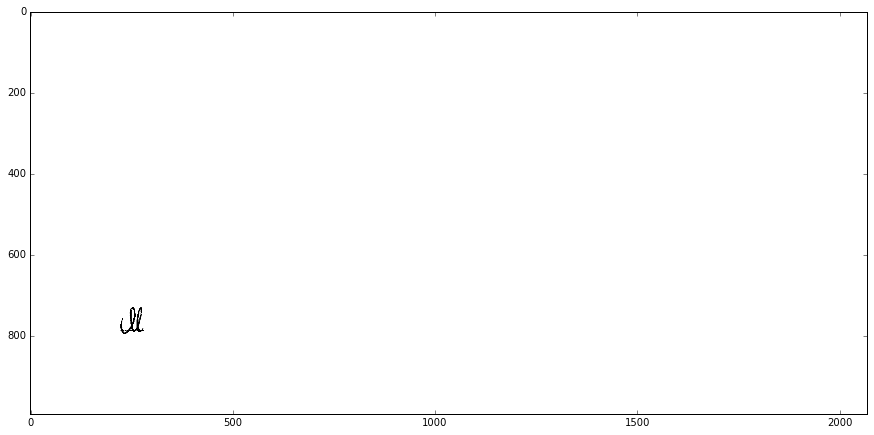

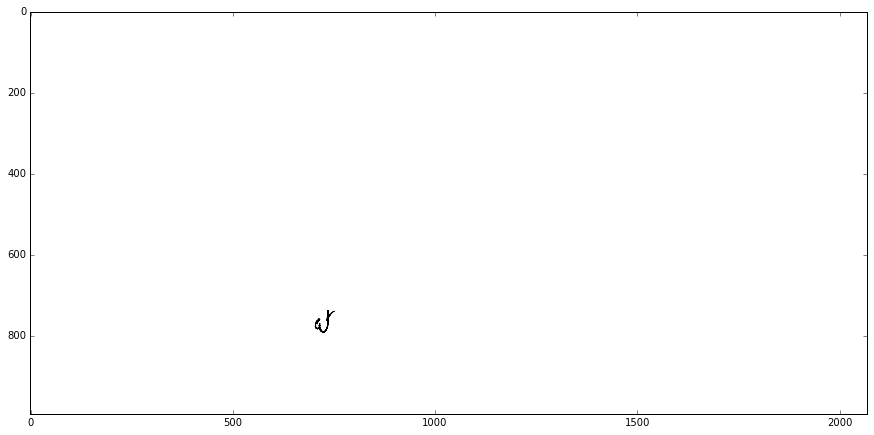

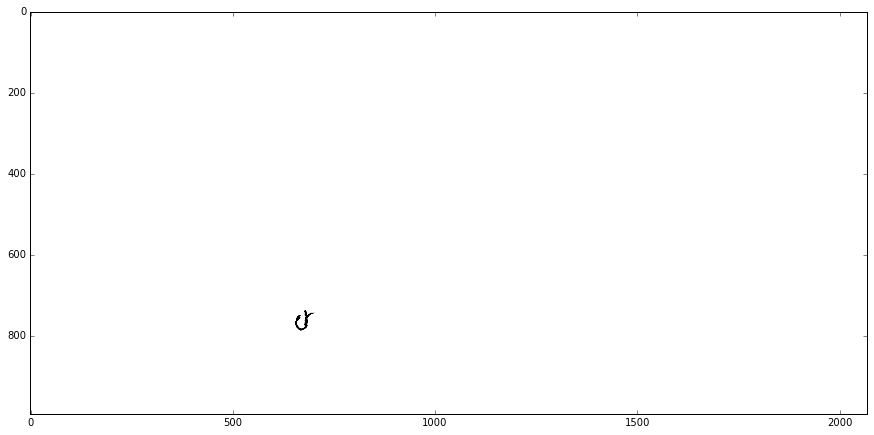

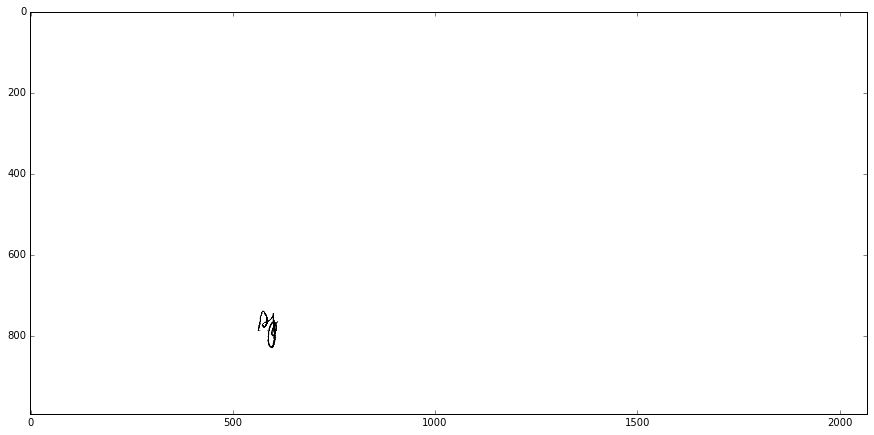

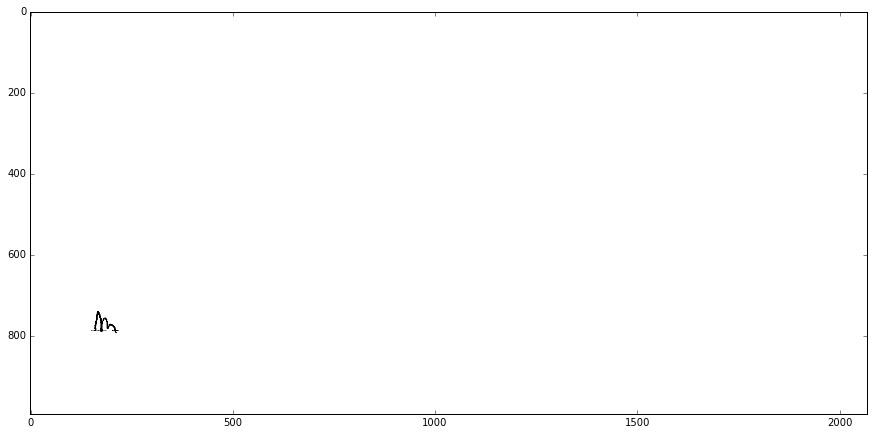

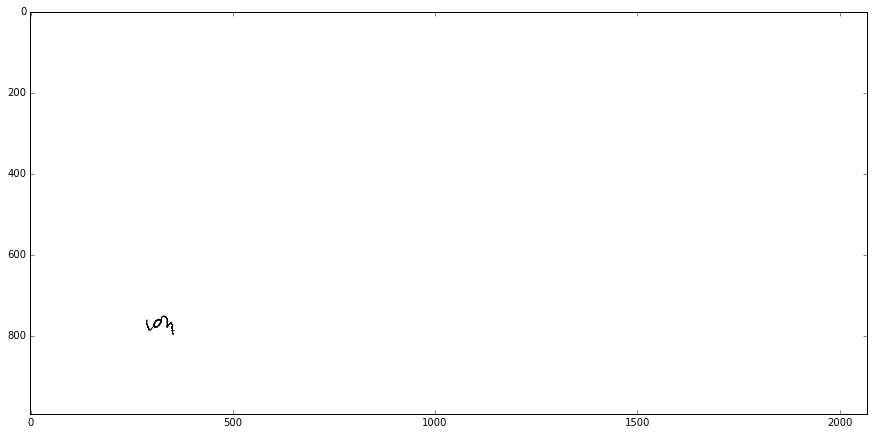

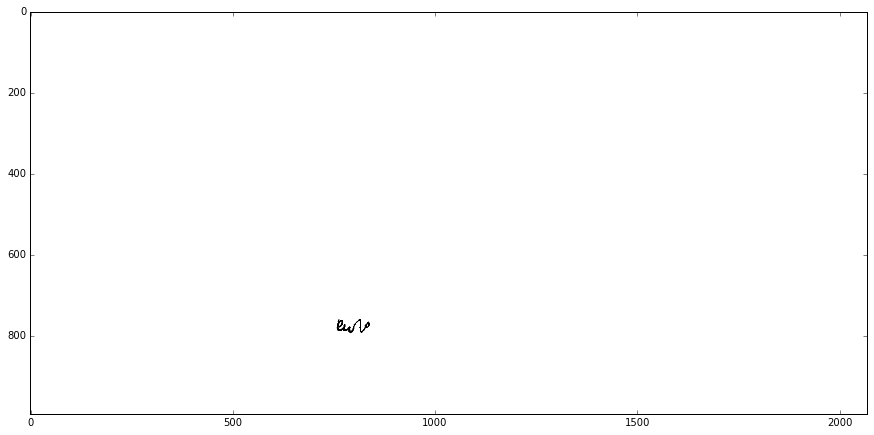

In [40]:
# plt.figure(figsize=(30,30))
# plt.imshow(cc1[0])
for i in ccs:
    plt.figure(figsize=(15,15))
    plt.imshow( 255-np.array(ccis[0]==i), cmap='gray' )
    plt.show()